<a href="https://colab.research.google.com/github/SubhamZap/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Mobile Price Range Prediction**
---


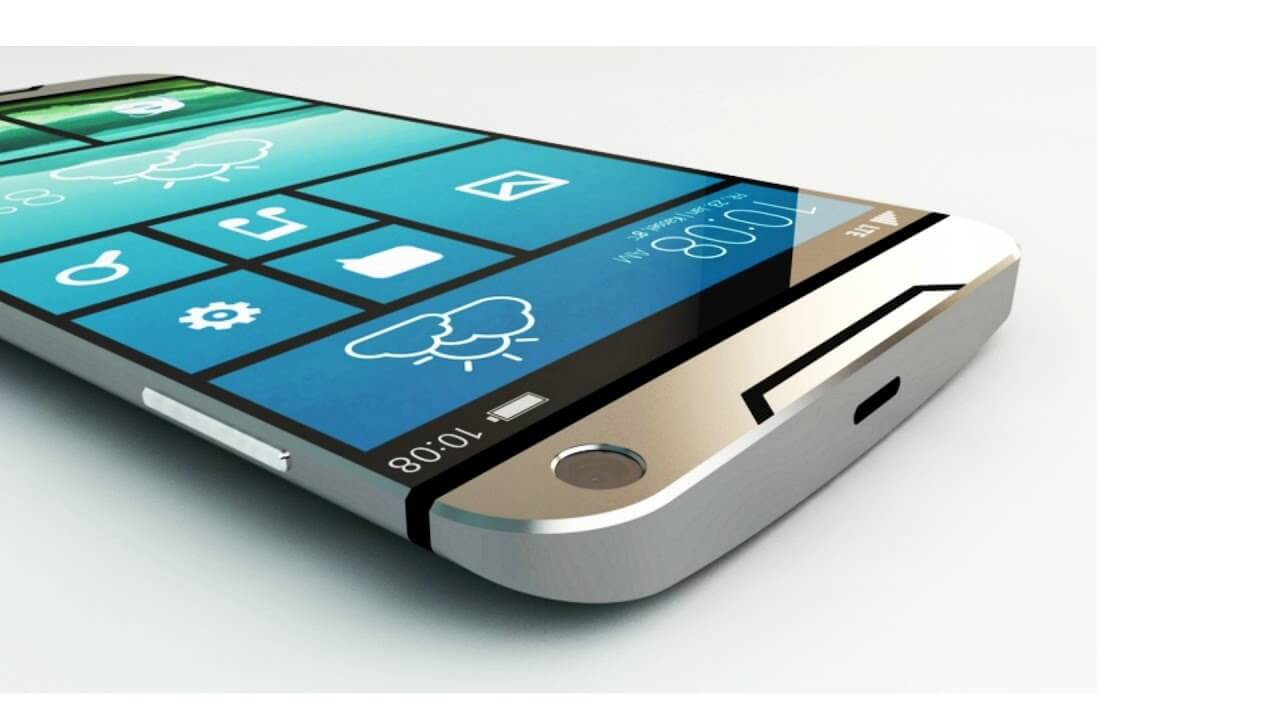

# **Problem Description**

## In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.

## The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# **Data Description**

### Battery_power - Total energy a battery can store in one time measured in mAh

### Blue - Has bluetooth or not

### Clock_speed - speed at which microprocessor executes instructions

### Dual_sim - Has dual sim support or not

### Fc - Front Camera mega pixels

### Four_g - Has 4G or not

### Int_memory - Internal Memory in Gigabytes

### M_dep - Mobile Depth in cm

### Mobile_wt - Weight of mobile phone

### N_cores - Number of cores of processor

### Pc - Primary Camera mega pixels

### Px_height - Pixel Resolution Height

### Px_width - Pixel Resolution Width

### Ram - Random Access Memory in Mega Bytes

### Sc_h - Screen Height of mobile in cm

### Sc_w - Screen Width of mobile in cm

### Talk_time - longest time that a single battery charge will last when you are

### Three_g - Has 3G or not

### Touch_screen - Has touch screen or not

### Wifi - Has wifi or not

### Price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Overview

In [3]:
# Loading the dataset

mobile_df = pd.read_csv('/content/drive/MyDrive/Mobile Price Range Prediction - Subham Choudhary/data_mobile_price_range.csv')
mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
mobile_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
# Data information

mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

There are zero null values in any column.

In [6]:
# Understanding the data

mobile_df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


There are some discrepancies in the data, cause the minimum value of pixel height (px_height) and screen width (sc_w) is zero, which isn't possible. We need to handle such discrepancies.

# Data Cleaning and Wrangling

In [7]:
# Total phones with sc_w = 0

len(mobile_df[mobile_df.sc_w == 0])

180

In [8]:
# Total phones with px_height = 0

len(mobile_df[mobile_df.px_height == 0])

2

As the number of phones with px_height = 0 and sc_w = 0 is small, we can assign the mean values of the respective columns.

In [9]:
# Assigning mean values to phones with sc_w = 0 and px_height = 0

mobile_df['sc_w'][mobile_df[mobile_df.sc_w == 0].index] = mobile_df.sc_w.mean()
mobile_df['px_height'][mobile_df[mobile_df.px_height == 0].index] = mobile_df.px_height.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
# Total phones with sc_w & px_height = 0

print('Total phones with sc_w = 0: ', len(mobile_df[mobile_df.sc_w == 0]))
print('Total phones with px_height = 0: ', len(mobile_df[mobile_df.px_height == 0]))

Total phones with sc_w = 0:  0
Total phones with px_height = 0:  0


In [11]:
# Drop any duplicate values

mobile_df.drop_duplicates(inplace = True)

In [12]:
# Number of unique values in each column

keys = [i  for i in mobile_df.columns]
values = [mobile_df[i].nunique() for i in keys]
Unique_df = pd.DataFrame()
Unique_df['features'] = keys
Unique_df['nunique'] = values

In [13]:
Unique_df

,features,nunique
0,battery_power,1094
1,blue,2
2,clock_speed,26
3,dual_sim,2
4,fc,20
5,four_g,2
6,int_memory,63
7,m_dep,10
8,mobile_wt,121
9,n_cores,8


The column with 2 distinct values can be categorized as binary features, column with not more than 100 distinct values can be categorized as discrete features and columns with 1000 distinct values can be categorized as continuous features.

In [14]:
# Categorizing binary, discrete and continuous features

binary_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
discrete_features = ['clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'sc_h', 'sc_w', 'talk_time']
continuous_features = ['battery_power', 'px_height', 'px_width', 'ram']

# Exploratory Data Analysis

## Continuous features

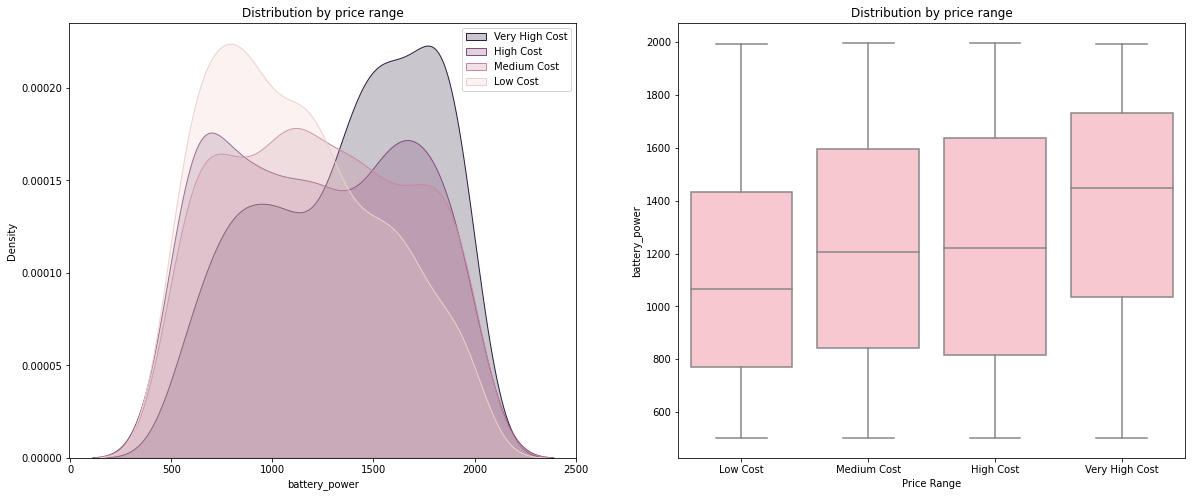

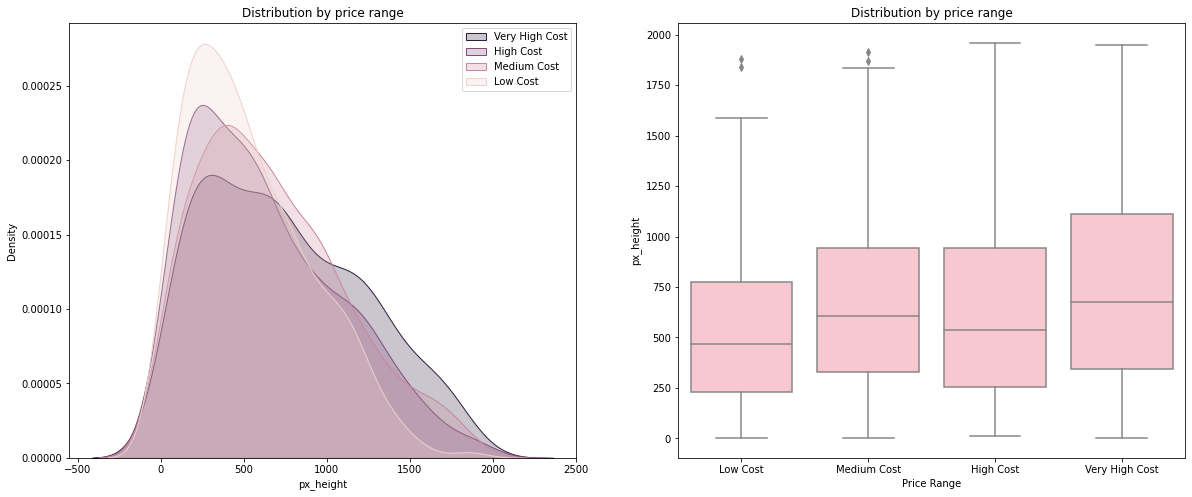

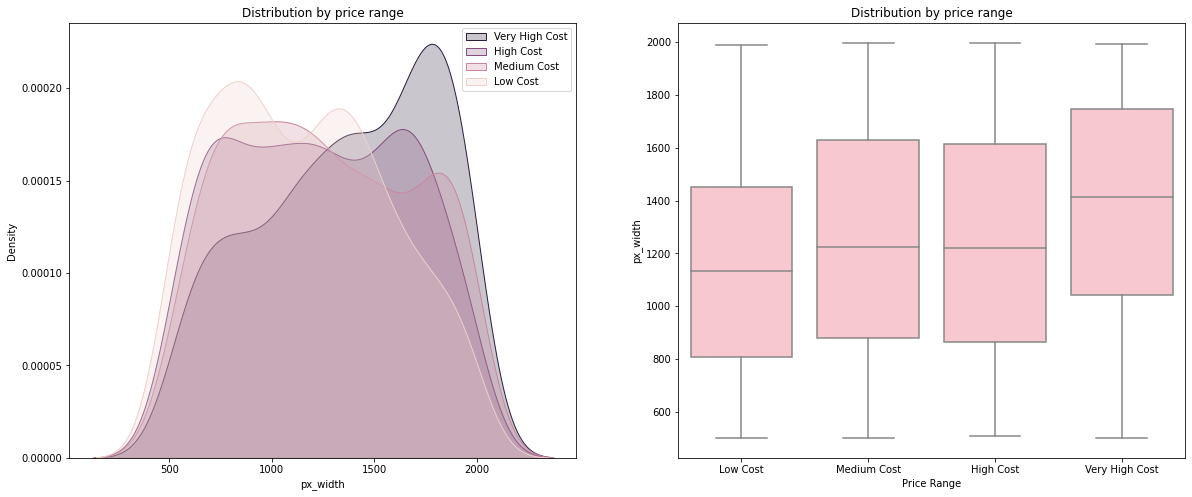

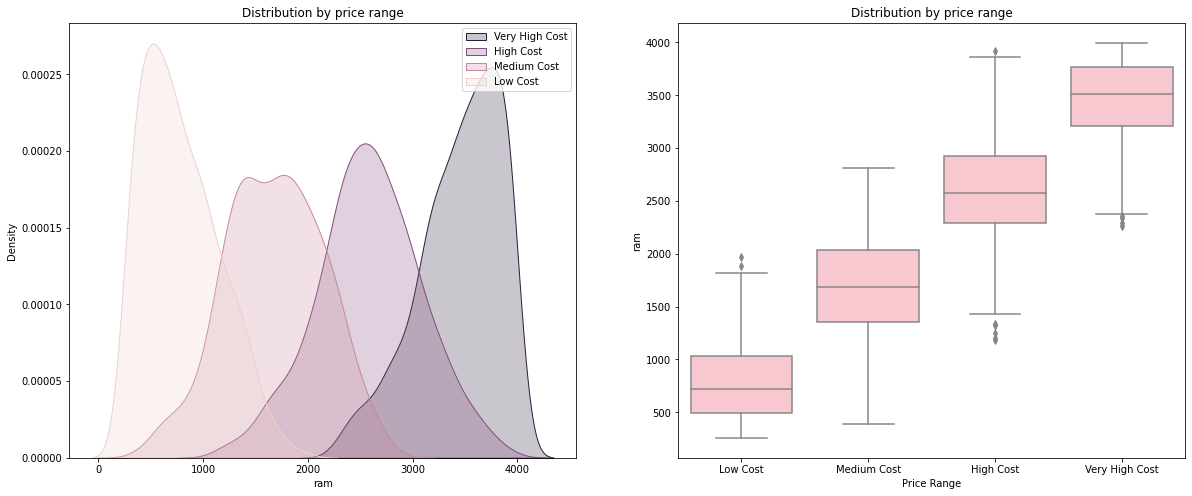

In [31]:
# Plot of continuous features against price range

for col in continuous_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 8))

  sns.kdeplot(x =  col, hue = 'price_range', data = mobile_df, ax = ax1, shade = True, fill = True)
  ax1.set_title('Distribution by price range')
  ax1.set_xlabel(col)
  ax1.legend(['Very High Cost', 'High Cost', 'Medium Cost', 'Low Cost'])

  sns.boxplot(x = 'price_range', y = col, data = mobile_df, ax = ax2, color = 'pink')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel('Price Range')
  ax2.set_ylabel(col)
  ax2.set_xticklabels(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])

For battery power, there is a gradual increase as the price range increases.

Pixel height is almost similar as we move from Low cost to Very high cost.


There is not a continuous increase in pixel width as we move from Low cost to Very high cost. Mobiles with 'Medium cost' and 'High cost' has almost equal pixel width.

Ram has continuous increase with price range and there is every few overlapping while moving from Low cost to Very high cost. 

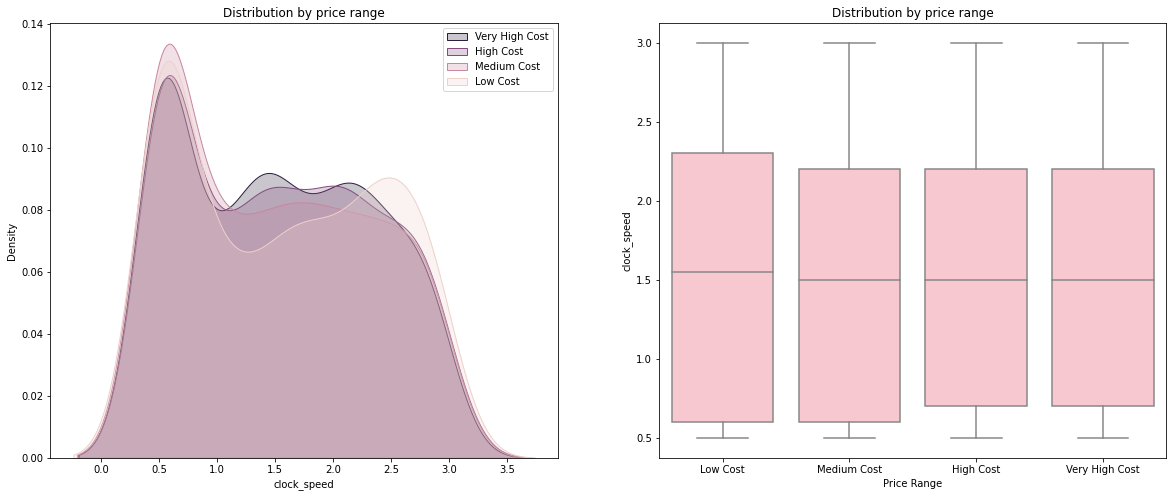

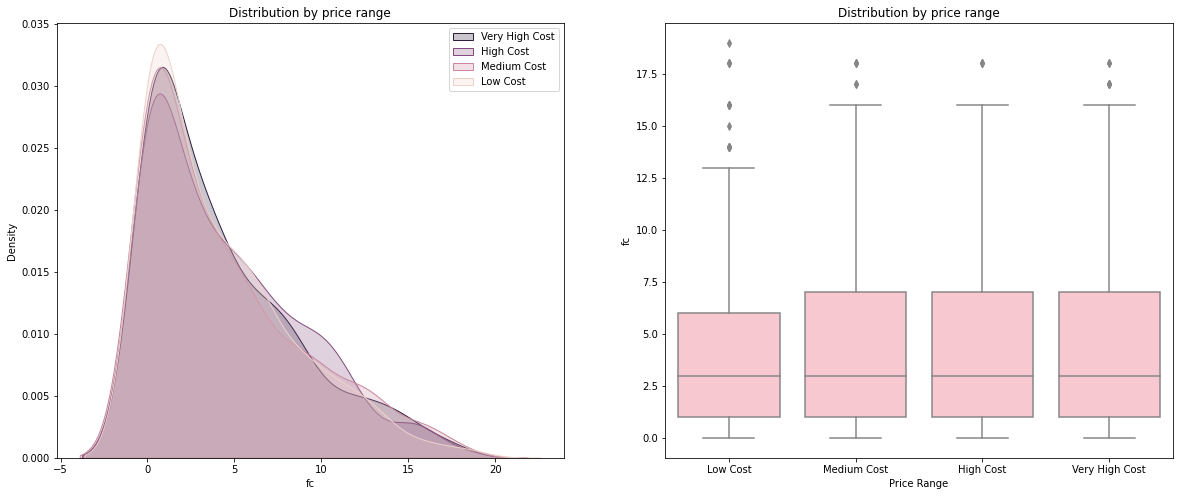

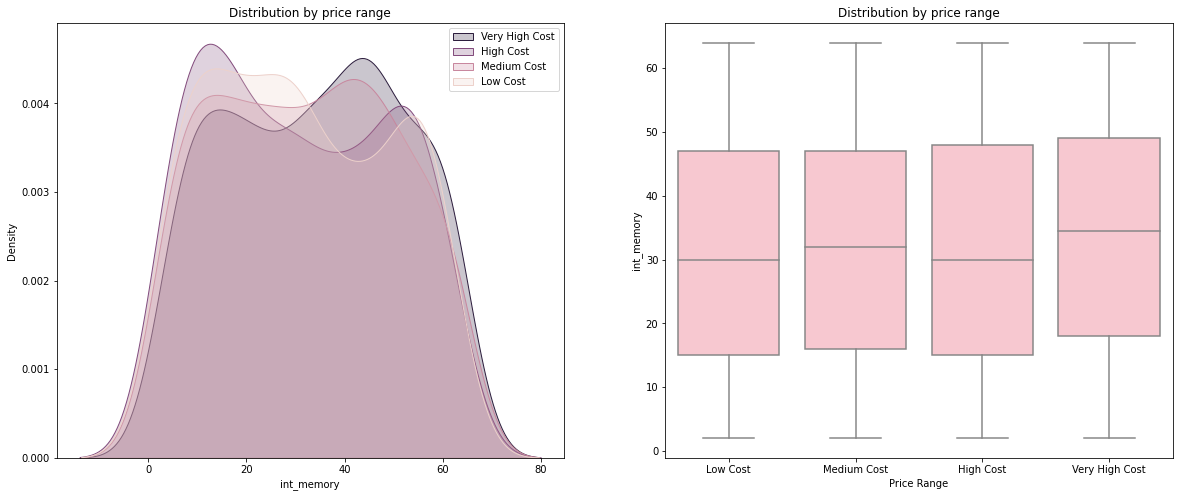

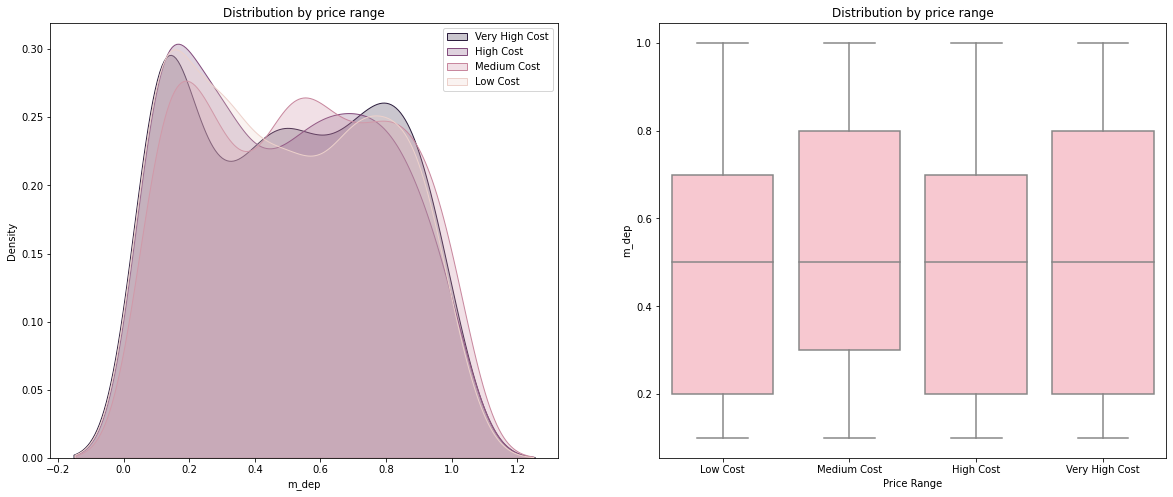

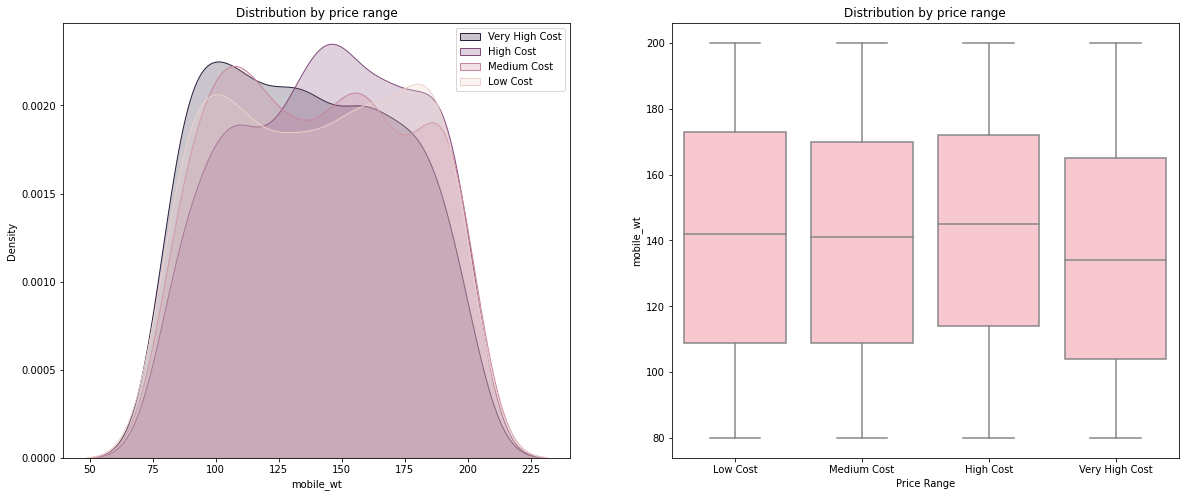

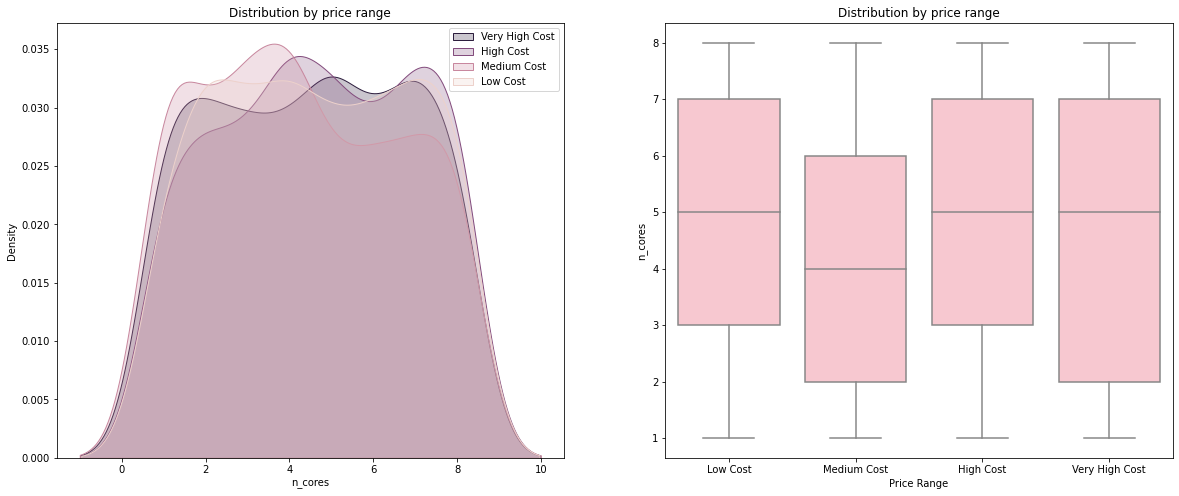

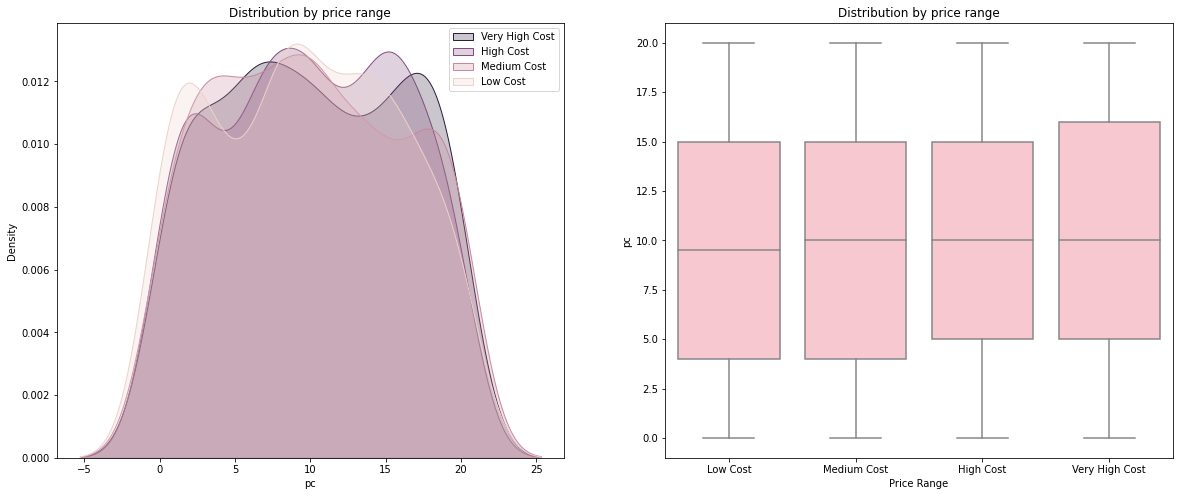

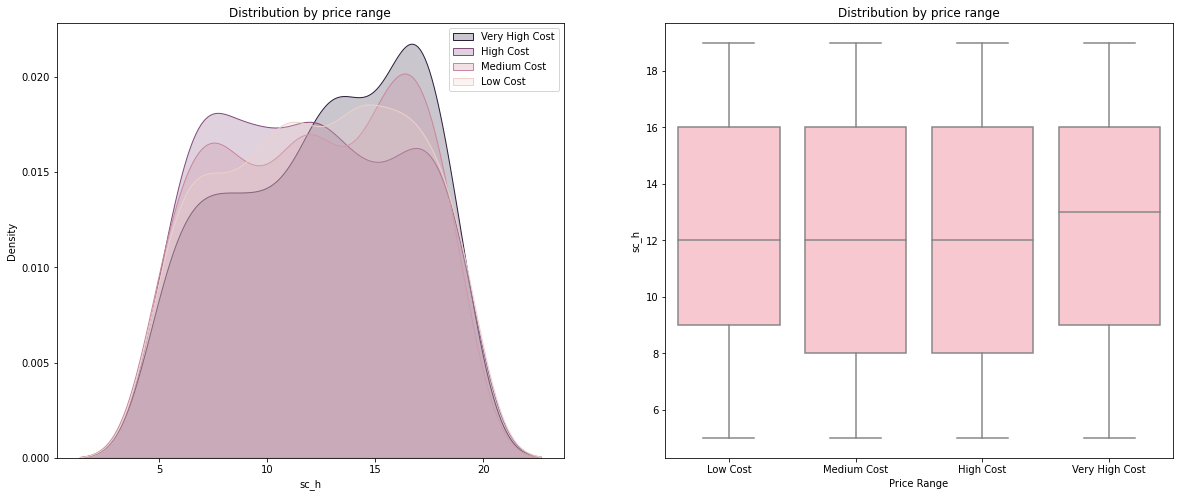

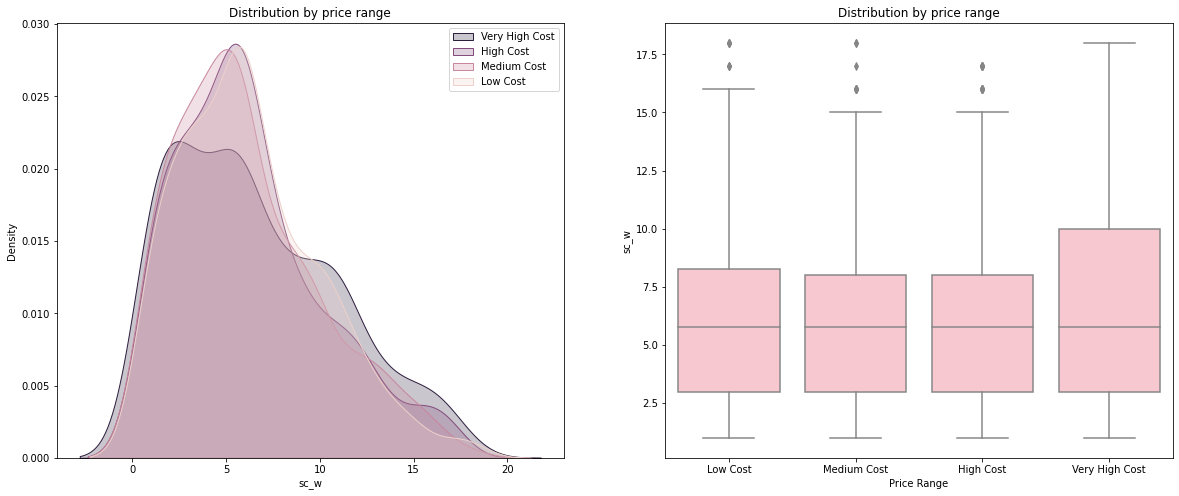

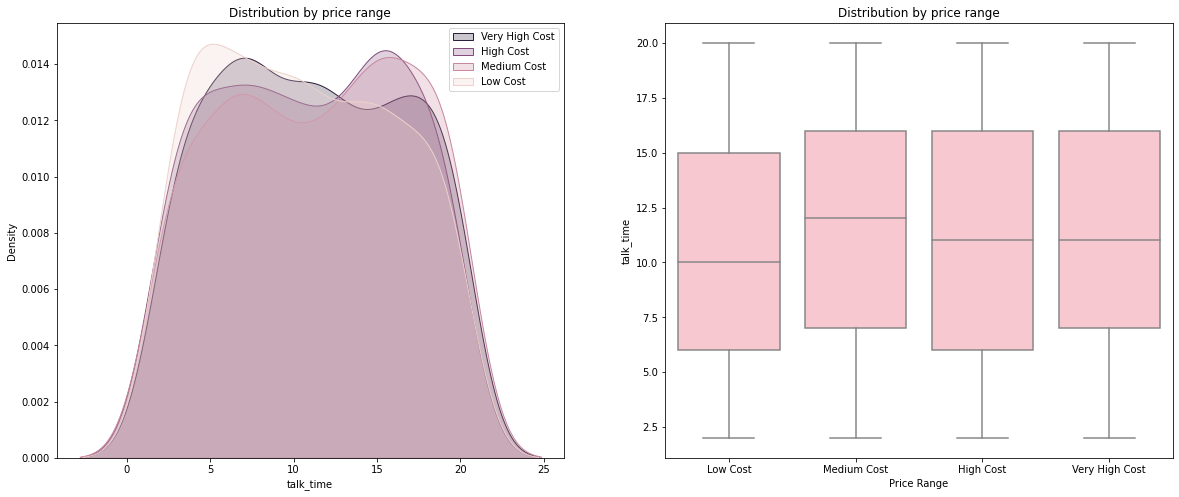

In [32]:
# Plot of discrete features against price range

for col in discrete_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 8))

  sns.kdeplot(x =  col, hue = 'price_range', data = mobile_df, ax = ax1, shade = True, fill = True)
  ax1.set_title('Distribution by price range')
  ax1.set_xlabel(col)
  ax1.legend(['Very High Cost', 'High Cost', 'Medium Cost', 'Low Cost'])

  sns.boxplot(x = 'price_range', y = col, data = mobile_df, ax = ax2, color = 'pink')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel('Price Range')
  ax2.set_ylabel(col)
  ax2.set_xticklabels(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])

Almost all variables under discrete features have similar mean values moving from Low cost to Very high cost. Here, we can hardly make any distinction. Hence, these features won't play a deciding factor in prediction of price range.

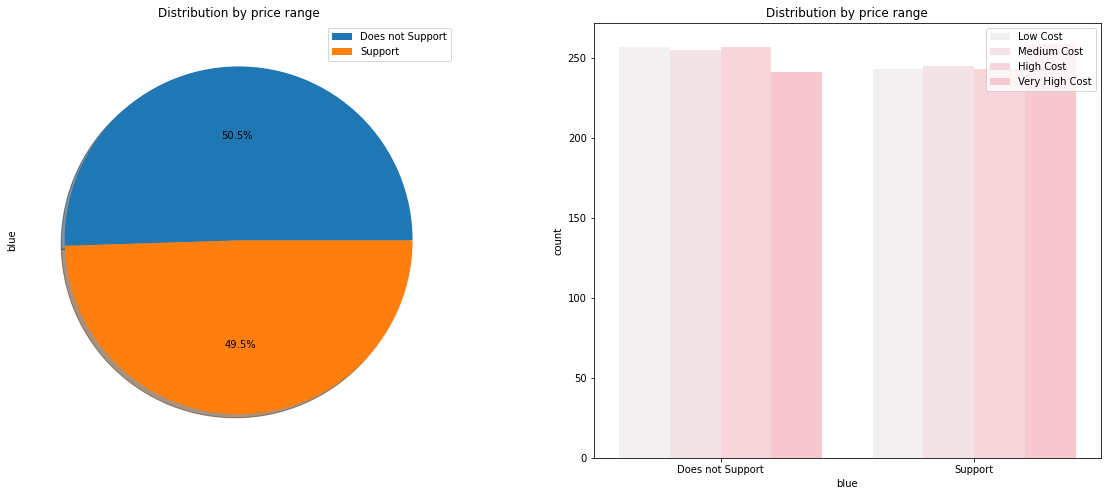

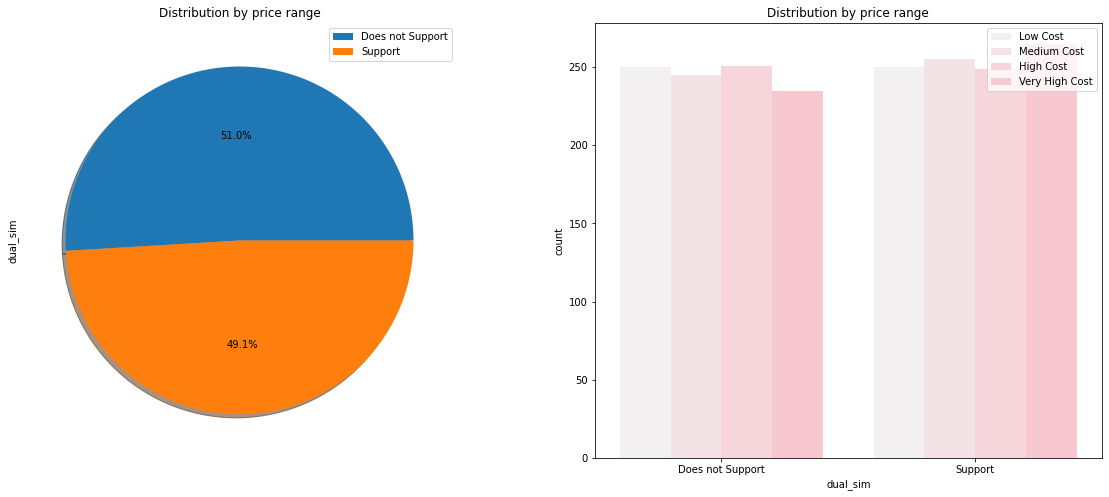

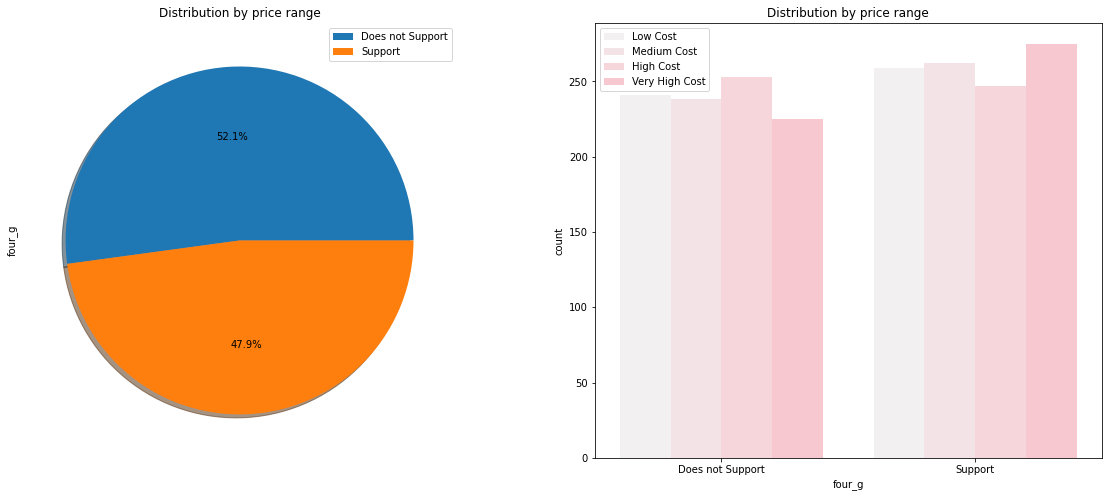

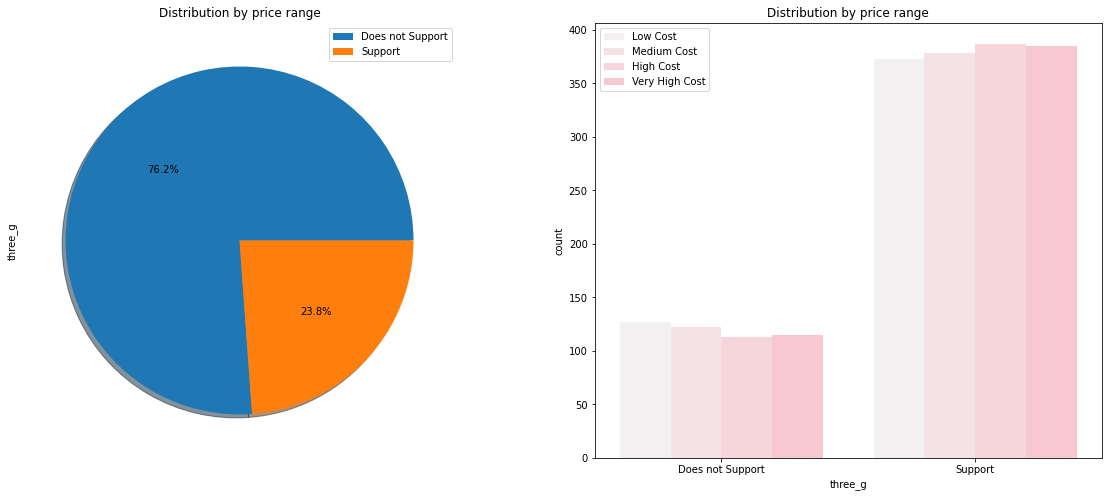

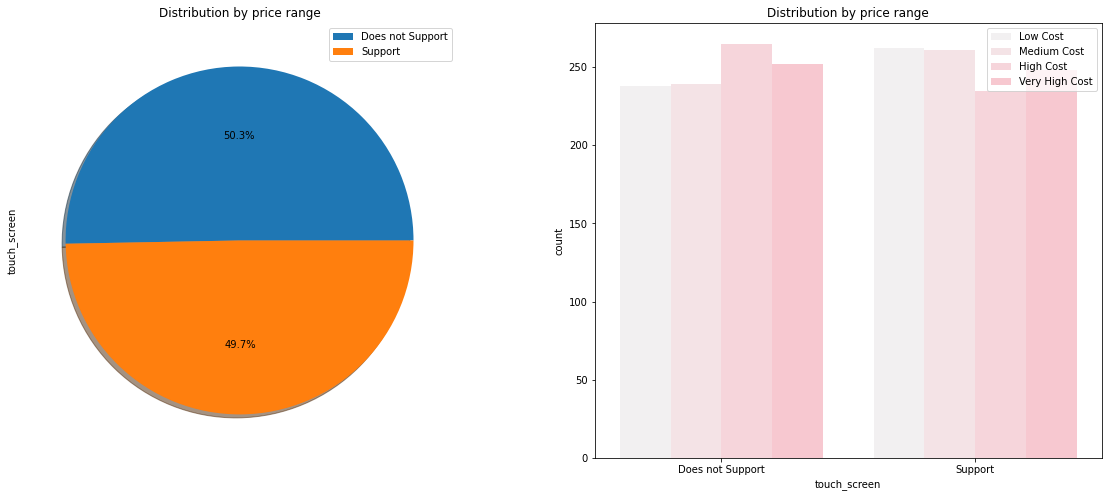

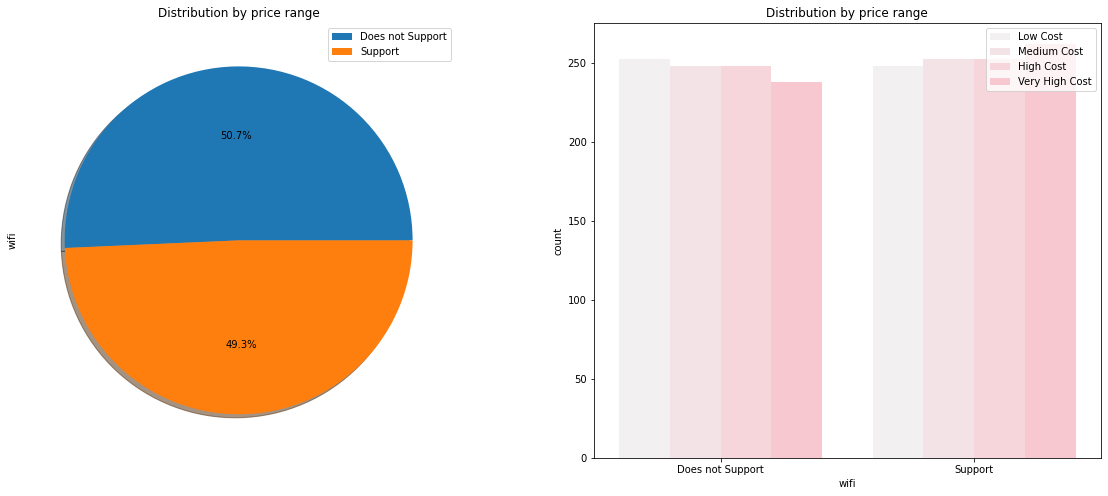

In [66]:
# Plot of binary features against price range

for col in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 8))

  mobile_df[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, shadow=True, labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Does not Support', 'Support'])

  sns.countplot(x = col, hue = 'price_range', data = mobile_df, ax = ax2, color = 'pink')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

The number of mobiles in both segments where it support or doesn't support the feature are almost similar. If we try to see the price distribution in these segments, it also doesn't show any variation. The number of mobiles is similar in all price range.

The only feature which showed some difference in the segments is three_g. The number of mobiles which doesn't support three_g are very few in number as compared to the one which supports it.

# Data Preparation

In [51]:
# Creating a copy of dataframe

mobile_copy_df = mobile_df.copy()

When we talk about screen sizes, we don't talk about the screen width or screen height, what we tell is the length of the diagonal of the screen. So, let's convert sc_h and sc_w into one feature sc_size and convert it to inches.

In [57]:
# Defining new variable sc_size

mobile_copy_df['sc_size'] = np.sqrt((mobile_copy_df['sc_h']**2) + (mobile_copy_df['sc_w']**2))
mobile_copy_df['sc_size'] = round(mobile_copy_df['sc_size']/2.54, 2)

In [58]:
mobile_copy_df[['sc_size', 'sc_h', 'sc_w']]

,sc_size,sc_h,sc_w
0,4.49,9,7.0
1,6.80,17,3.0
2,4.40,11,2.0
3,7.04,16,8.0
4,3.25,8,2.0
...,...,...,...
1995,5.35,13,4.0
1996,5.85,11,10.0
1997,3.57,9,1.0
1998,8.11,18,10.0


In [61]:
# Let's drop sc_h and s_w

mobile_copy_df.drop(['sc_h', 'sc_w'], axis = 1, inplace = True)

When we speak about RAM, we usually talk in Gigabytes, so let's convert RAM size from Megabytes to Gigabytes.

In [63]:
# Converting RAM from MB to GB

mobile_copy_df['ram'] = round(mobile_copy_df['ram']/1024, 2)

Let's define a new variable 'network' where mobiles which doesn't support both three_g and four_g are assigned 0, one that only support three_g should be assigned 1 and one that support both three_g and four_g should be assigned 2.

In [69]:
# Defining new variable (network)

mobile_copy_df['network'] = mobile_copy_df['three_g'] + mobile_copy_df['four_g']

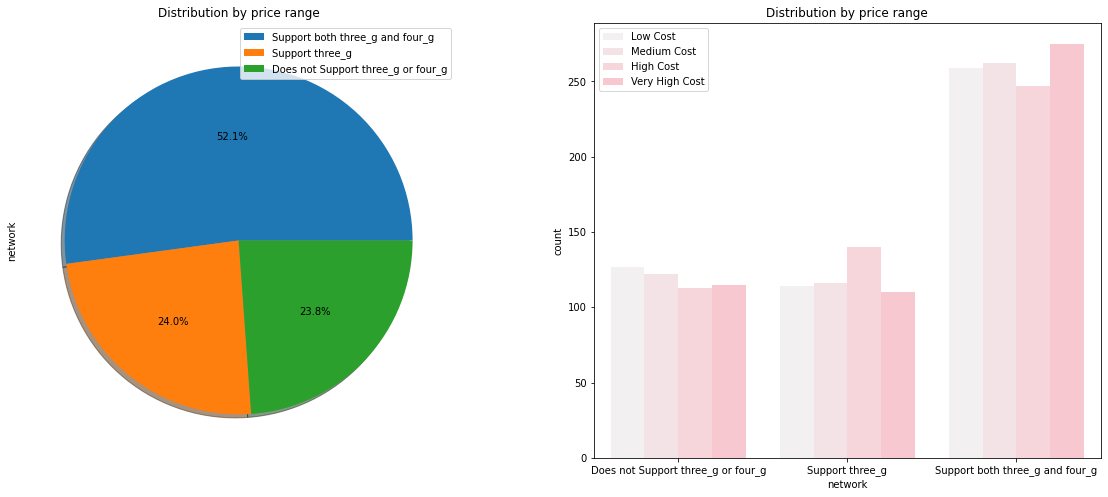

In [76]:
# Plot of new variable (network) wrt price range

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 8))

mobile_copy_df['network'].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, shadow=True, labeldistance=None)
ax1.set_title('Distribution by price range')
ax1.legend(['Support both three_g and four_g', 'Support three_g', 'Does not Support three_g or four_g'])

sns.countplot(x = 'network', hue = 'price_range', data = mobile_copy_df, ax = ax2, color = 'pink')
ax2.set_title('Distribution by price range')
ax2.set_xlabel('network')
ax2.set_xticklabels(['Does not Support three_g or four_g', 'Support three_g', 'Support both three_g and four_g'])
ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])

This plot explains that most phones support both three_g and four_g, whereas 24% mobiles only support three_g and rest doesn't support both three_g or four_g.

In [78]:
# Let's drop three_g and four_g columns

mobile_copy_df.drop(['three_g', 'four_g'], axis = 1, inplace = True)

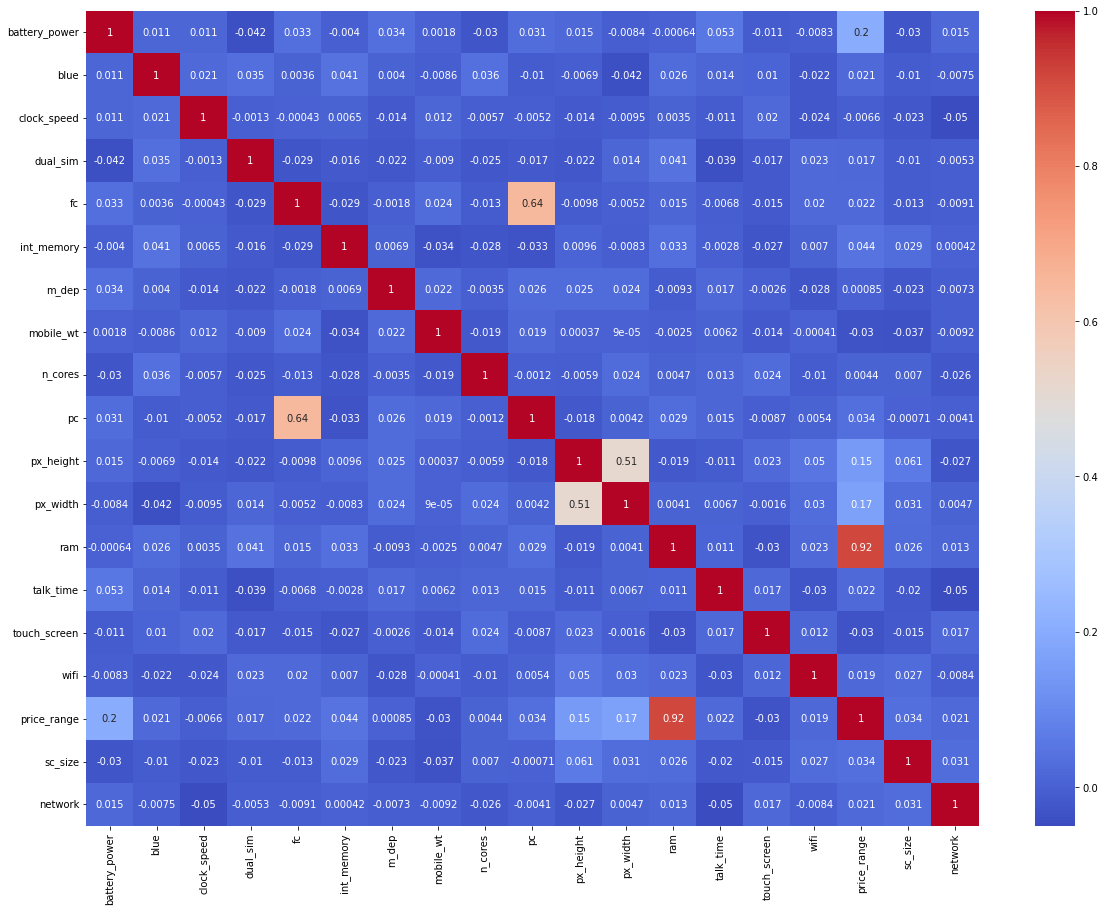

In [79]:
# Checking for multi-collinearity

correlation = mobile_copy_df.corr()
plt.figure(figsize = [20, 15])
sns.heatmap(correlation, cmap = 'coolwarm', annot = True)

RAM and price_range shows high correlation ehich is a good sign, it signifies that RAM will play major deciding factor in estimating the price range.

There is some colinearity in feature pairs ('pc', 'fc') and ('px_width', 'px_height'). Both correlations are justified since there are good chances that if front camera of a phone is good, the back camera would also be good.

Also if px_height increases, pixel width also increases, that means the overall pixels in the screen. We can replace these two features with one feature.

In [80]:
#  defining new variable for pixels

mobile_copy_df['pixels'] = mobile_copy_df['px_height']*mobile_copy_df['px_width']

In [82]:
# Dropping px_height and px_width

mobile_copy_df.drop(['px_height', 'px_width'], axis = 1, inplace = True)

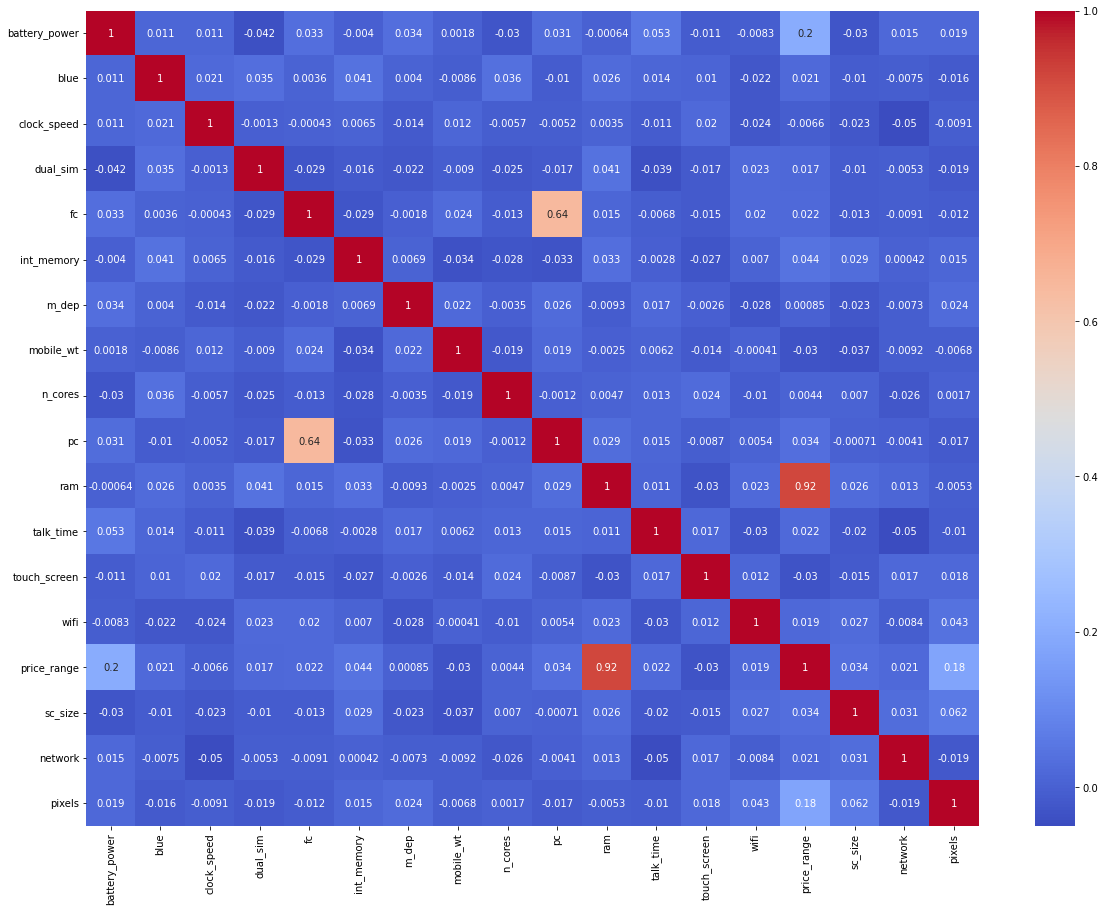

In [83]:
# Checking for multi-collinearity

correlation = mobile_copy_df.corr()
plt.figure(figsize = [20, 15])
sns.heatmap(correlation, cmap = 'coolwarm', annot = True)

Front Camera megapixels and Primary camera megapixels are different entities despite of showing colinearity. So we'll be keeping them as they are.